# 🟡 Installing Required Libraries 🟡

In [ ]:
!pip install mplfinance

!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.9 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import LSTM ,Dense,Dropout
from sklearn.metrics import classification_report,confusion_matrix

#Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traffic_df=pd.read_csv("/content/Expanded_Traffic_With_Coords (1).csv",parse_dates=['DateTime'], index_col='DateTime')
traffic_df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Latitude,Longitude
DateTime,,,,,,,,,
2024-01-01 00:00:00,Tuesday,32,0,4,4,40,low,40.71280,-74.006000
2024-01-01 00:15:00,Tuesday,49,0,3,3,55,low,40.73061,-73.935242
2024-01-01 00:30:00,Tuesday,47,0,3,6,57,low,40.84480,-73.864800
2024-01-01 00:45:00,Tuesday,55,0,2,5,62,low,40.72820,-73.794900
2024-01-01 01:00:00,Tuesday,56,6,15,16,93,normal,40.57950,-74.150200


#Data EDA

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60000 entries, 2024-01-01 00:00:00 to 2025-09-16 23:45:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day of the week    60000 non-null  object 
 1   CarCount           60000 non-null  int64  
 2   BikeCount          60000 non-null  int64  
 3   BusCount           60000 non-null  int64  
 4   TruckCount         60000 non-null  int64  
 5   Total              60000 non-null  int64  
 6   Traffic Situation  60000 non-null  object 
 7   Latitude           60000 non-null  float64
 8   Longitude          60000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 4.6+ MB


In [ ]:
traffic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CarCount,60000.0,66.441250,45.288426,4.0000,19.0000,63.000000,104.000000,200.0000
BikeCount,60000.0,13.013333,12.073038,0.0000,3.0000,10.000000,20.000000,78.0000
BusCount,60000.0,13.631667,13.156253,0.0000,1.0000,11.000000,22.000000,56.0000
TruckCount,60000.0,17.617067,11.010865,0.0000,9.0000,17.000000,26.000000,63.0000
Total,60000.0,110.703267,57.690248,19.0000,55.0000,105.000000,156.000000,313.0000
Latitude,60000.0,40.720004,0.063088,40.5795,40.7069,40.720500,40.748817,40.8448
Longitude,60000.0,-73.969363,0.090372,-74.1502,-74.0113,-73.985464,-73.935242,-73.7949


In [ ]:
traffic_df.isnull().sum()

,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Latitude,0
Longitude,0


In [ ]:
traffic_df.shape

(60000, 9)

In [ ]:
traffic_df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,35642
heavy,12164
low,7526
high,4668


In [ ]:
traffic_df['Traffic Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [ ]:
le=LabelEncoder()
traffic_df ["Traffic Situation"]=le.fit_transform(traffic_df ["Traffic Situation"])
day_le=LabelEncoder()
traffic_df ["Day of the week"]=day_le.fit_transform(traffic_df ["Day of the week"])

In [ ]:
traffic_df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Latitude,Longitude
DateTime,,,,,,,,,
2024-01-01 00:00:00,5,32,0,4,4,40,2,40.71280,-74.006000
2024-01-01 00:15:00,5,49,0,3,3,55,2,40.73061,-73.935242
2024-01-01 00:30:00,5,47,0,3,6,57,2,40.84480,-73.864800
2024-01-01 00:45:00,5,55,0,2,5,62,2,40.72820,-73.794900
2024-01-01 01:00:00,5,56,6,15,16,93,3,40.57950,-74.150200


#Data Visulaztion

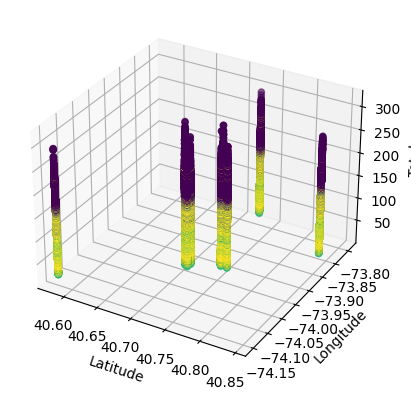

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(traffic_df['Latitude'], traffic_df['Longitude'], traffic_df['Total'], c=traffic_df['Traffic Situation'], cmap='viridis')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Total')
plt.show()


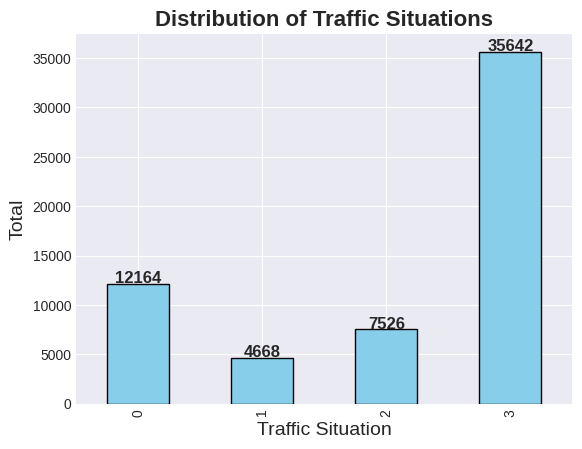

In [ ]:
plt.style.use('seaborn-darkgrid')

traffic_df['Traffic Situation'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Traffic Situations', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Situation', fontsize=14)
plt.ylabel('Total', fontsize=14)

# Adding the count values on top of the bars for better insight
for index, value in enumerate(traffic_df['Traffic Situation'].value_counts().sort_index()):
    plt.text(index, value + 100, str(value), ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


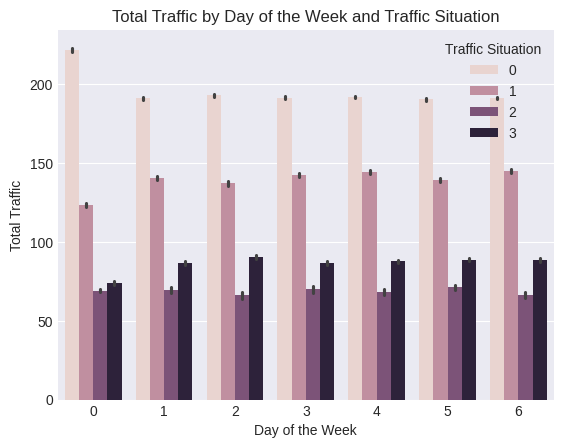

In [ ]:
sns.barplot(x='Day of the week', y='Total', hue='Traffic Situation', data=traffic_df)
plt.title('Total Traffic by Day of the Week and Traffic Situation')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic')
plt.show()


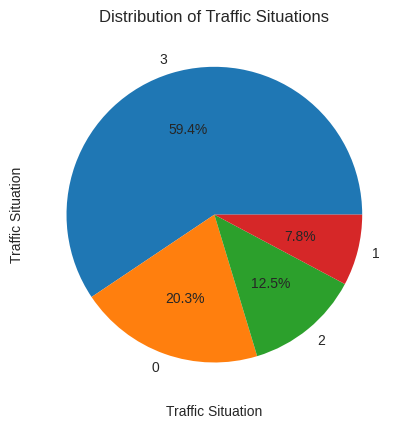

In [ ]:
traffic_df['Traffic Situation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Traffic Situation')
plt.show()

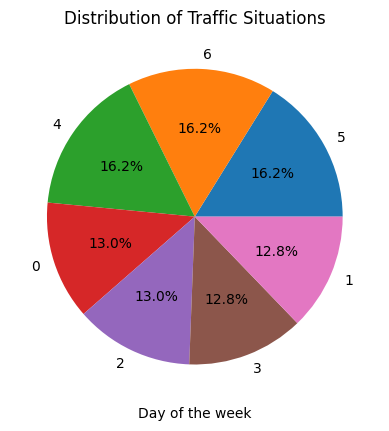

In [ ]:
traffic_df['Day of the week'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Day of the week')
plt.ylabel('')
plt.show()

In [ ]:
#separating the numrical datatype in different dataset
num_df=traffic_df.select_dtypes(include=['int64'])
corr=num_df.corr()
print(corr)

                   Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
Day of the week           1.000000  0.007743  -0.105404  0.115713    0.042718   
CarCount                  0.007743  1.000000   0.712788  0.669674   -0.608350   
BikeCount                -0.105404  0.712788   1.000000  0.578332   -0.594790   
BusCount                  0.115713  0.669674   0.578332  1.000000   -0.551154   
TruckCount                0.042718 -0.608350  -0.594790 -0.551154    1.000000   
Total                     0.018502  0.970824   0.787156  0.769545   -0.536858   
Traffic Situation         0.026082 -0.703542  -0.591566 -0.644092    0.489034   

                      Total  Traffic Situation  
Day of the week    0.018502           0.026082  
CarCount           0.970824          -0.703542  
BikeCount          0.787156          -0.591566  
BusCount           0.769545          -0.644092  
TruckCount        -0.536858           0.489034  
Total              1.000000          -0.729618  
Traffic 

In [ ]:
num_df=num_df.drop(['TruckCount','CarCount'],axis=1)
corr=num_df.corr()


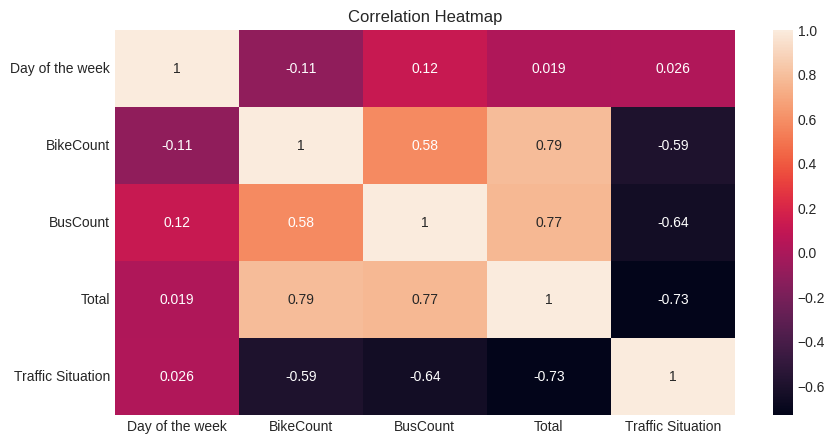

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True  )
plt.title('Correlation Heatmap')
plt.show()

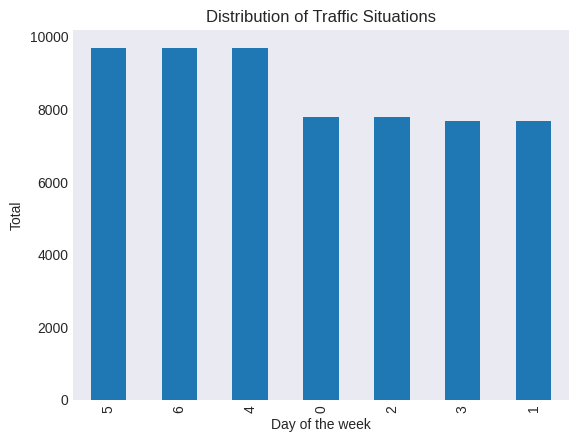

In [ ]:
traffic_df['Day of the week'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Day of the week')
plt.ylabel('Total')
plt.show()

#Prossecing on TimeSerise Data

#spliting data


In [ ]:
# traffic_df=traffic_df.iloc[:2000]

In [ ]:
traffic_df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Latitude,Longitude
DateTime,,,,,,,,,
2024-01-01 00:00:00,5,32,0,4,4,40,2,40.71280,-74.006000
2024-01-01 00:15:00,5,49,0,3,3,55,2,40.73061,-73.935242
2024-01-01 00:30:00,5,47,0,3,6,57,2,40.84480,-73.864800
2024-01-01 00:45:00,5,55,0,2,5,62,2,40.72820,-73.794900
2024-01-01 01:00:00,5,56,6,15,16,93,3,40.57950,-74.150200


In [ ]:
traffic_df.shape

(60000, 9)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(traffic_df)

In [ ]:
def create_dataset(dataset, time_step=1):
  X, Y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    X.append(a)
    Y.append(dataset[i + time_step, 0])
  return np.array(X), np.array(Y)

In [ ]:
scaled_data.shape

(60000, 9)

In [ ]:
time_step = 3
scaled_data=traffic_df[['Traffic Situation']].values

In [ ]:
X,Y= create_dataset(scaled_data, time_step)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(32, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(1))
# model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 1.6070 - val_loss: 0.8749
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.8619 - val_loss: 0.8678
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.8572 - val_loss: 0.8625
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.8558 - val_loss: 0.8652
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.8543 - val_loss: 0.8654
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.8550 - val_loss: 0.8650
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.8534 - val_loss: 0.8627
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.8575 - val_loss: 0.8564
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.8587 - val_loss: 0.8587
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.8498 - val_loss: 0.8569
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.8465 - val_loss: 0.8614
Epoch 12/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s

In [ ]:
pred = model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred

array([[2.7475424],
       [2.5788655],
       [2.7475424],
       ...,
       [1.896473 ],
       [1.0856111],
       [2.7475424]], dtype=float32)

#Visulaztion & Evaluating Model





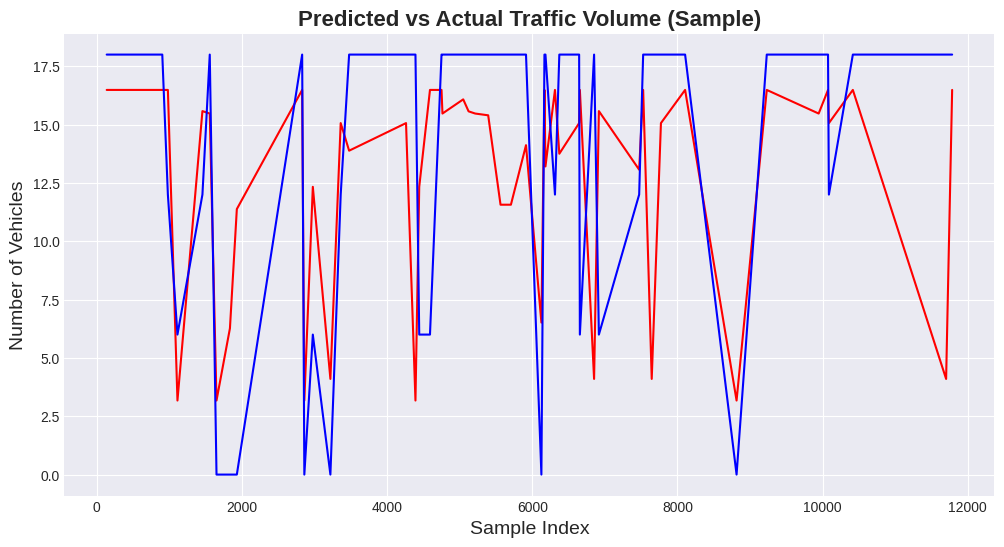

In [ ]:
pred_reshaped = np.zeros((pred.shape[0], 9))
pred_reshaped[:, 0] = pred.flatten()

# Inverse transform and extract the first column
pred_rescaled = scaler.inverse_transform(pred_reshaped)[:, 0]

# Similarly for y_test
y_test_reshaped = np.zeros((y_test.shape[0], 9))
y_test_reshaped[:, 0] = y_test

# Inverse transform and extract the first column
Y_test_rescaled = scaler.inverse_transform(y_test_reshaped)[:, 0]

# Select a sample size for plotting
sample_size = 50  # Adjust this number as needed
sample_indices = np.random.choice(len(Y_test_rescaled), sample_size, replace=False)

# Sort the indices to maintain chronological order
sample_indices = np.sort(sample_indices)

# Plotting the selected sample with positions switched
plt.figure(figsize=(12, 6))
plt.plot(sample_indices, pred_rescaled[sample_indices], color='red')
plt.plot(sample_indices, Y_test_rescaled[sample_indices], color='blue')
plt.title('Predicted vs Actual Traffic Volume (Sample)', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#evaluate
mse = mean_squared_error(Y_test_rescaled, pred_rescaled)
print('Mean Squared Error:', mse)
mean_absolute_error = np.mean(np.abs(Y_test_rescaled - pred_rescaled))
print('Mean Absolute Error:', mean_absolute_error)

Mean Squared Error: 30.512508714798663
Mean Absolute Error: 4.160015695512294


## Model Evaluation Results

Mean Squared Error (MSE): 30.51
Mean Absolute Error (MAE): 4.16


---
MSE Interpretation: The average squared difference between the predicted and actual values is 30.51. This metric is sensitive to larger errors due to the squaring effect and provides an indication of the variance in prediction errors.


---


MAE Interpretation: The average absolute difference between the predicted and actual values is 4.16. This metric gives a more straightforward interpretation of prediction accuracy, indicating that, on average, the model's predictions are off by about 4.16 units.


---


## Conclusion:
The MSE and MAE values provide insights into the accuracy of the model. MSE reflects the overall error variance and is influenced by larger errors, while MAE offers a clearer view of average prediction accuracy. The suitability of these values depends on the scale of the target variable and the specific context of the problem.

#save the model

In [ ]:
model.save('traffic_model.h5')